In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
dataset = pd.read_csv('grid.csv')
dataset['stabf'].replace('unstable', 0, inplace = True)
dataset['stabf'].replace('stable', 1, inplace = True)
dataset.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,0
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,1
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,0
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,0
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,0


In [3]:
X = dataset.drop('stabf', axis=1)
y = dataset['stabf']

feature_names=['tau1','tau2','tau3','tau4','p1','p2','p3','p4','g1','g2','g3','g4']

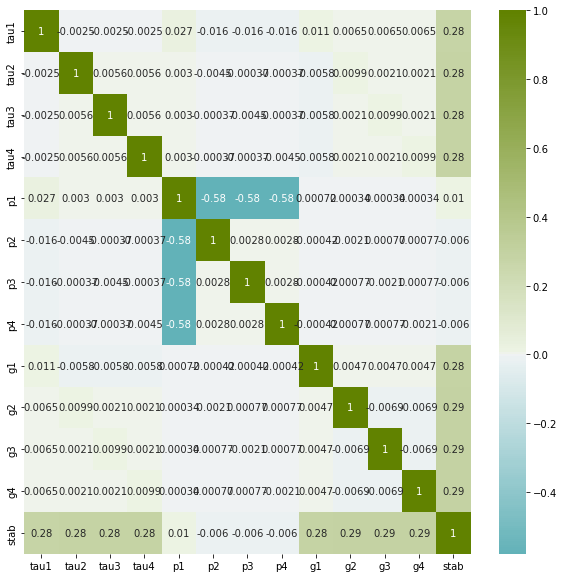

In [4]:
corr_data = X.corr()
fig, ax = plt.subplots(figsize = (10, 10))
color_map = sns.diverging_palette(204, 106, s = 100, as_cmap=True)
sns.heatmap(corr_data,cmap=color_map, annot=True, ax = ax, center=0.00000)
plt.show()
del corr_data

Maximum accuracy:- 0.9964 at learning rate = 1.0


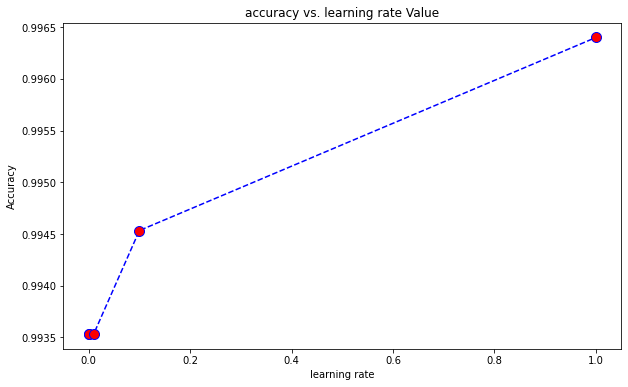

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle =True, test_size=0.25, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
from sklearn import metrics
learnRate=[0.0001, 0.001, 0.01, 0.1, 1.0]
acc=[]
for i in learnRate:
    clf= Perceptron(eta0= i)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, y_pred))
    
plt.figure(figsize=(10,6))
plt.plot(learnRate,acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. learning rate Value')
plt.xlabel('learning rate')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at learning rate =",learnRate[acc.index(max(acc))])

best_eta0=learnRate[acc.index(max(acc))]














C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Maximum accuracy:- 0.9964 at no of epochs = 100
[0.9930666666666667, 0.9964, 0.9964, 0.9964]


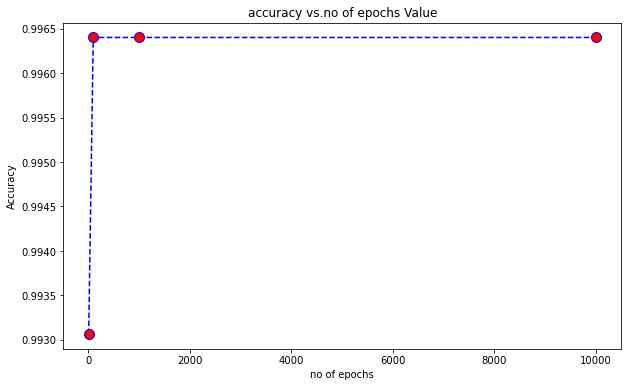

In [28]:
epochsNo=[10, 100, 1000, 10000]
acc=[]
for i in epochsNo:
    clf= Perceptron(eta0= best_eta0,max_iter=i)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, y_pred))
    
plt.figure(figsize=(10,6))
plt.plot(epochsNo,acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs.no of epochs Value')
plt.xlabel('no of epochs')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at no of epochs =",epochsNo[acc.index(max(acc))])

best_epoch=epochsNo[acc.index(max(acc))]
print(acc)

In [29]:

clf = Perceptron(eta0= best_eta0,max_iter=best_epoch)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)  
print ("Confusion Matrix : \n", cm)
print("")

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1-score:", (2*metrics.precision_score(y_test, y_pred)*metrics.recall_score(y_test, y_pred)) / (metrics.precision_score(y_test, y_pred) + metrics.recall_score(y_test, y_pred)))

Confusion Matrix : 
 [[9541   29]
 [  25 5405]]

Accuracy: 0.9964
Precision: 0.9946632315053368
Recall: 0.9953959484346224
F1-score: 0.9950294550810014
